In [22]:
%%capture
%run preprocess_flags.ipynb

In [23]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import GenericUnivariateSelect, chi2, f_classif, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = normalized_df
random_state: int = 0
np.random.seed(42)
X = df.drop("religion", axis=1)
y = df["religion"]
religion_encoder = LabelEncoder()
religion_encoder.fit(y)
y = religion_encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

train_countries = X_train["name"]
test_countries = X_test["name"]

X_train.drop("name", axis=1, inplace=True)
X_test.drop("name", axis=1, inplace=True)

In [25]:
feature_selector = GenericUnivariateSelect()
pipeline = Pipeline(steps=[("feature_selector", feature_selector), ("classifier", KNeighborsClassifier())])
pipelines = {
    "KNeighborsClassifier": pipeline
}

In [26]:
freq = 4

cross_args = {
    "KNeighborsClassifier": [
        {
            "feature_selector__score_func": [chi2, f_classif],
            "feature_selector__mode": ["fpr", "fdr", "fwe"],
            "feature_selector__param": np.arange(0.0, 0.5, 0.025),
            "classifier__n_neighbors": [1, 5, 10, 50],
            "classifier__weights": ["uniform", "distance"],
            "classifier__algorithm": ["ball_tree", "kd_tree", "brute"],
            "classifier__p": [1, 2],
        }, 
        {
            "feature_selector__score_func": [chi2, f_classif, mutual_info_classif],
            "feature_selector__mode": ["k_best"],
            "feature_selector__param": list(range(5, X_train.shape[1])),
            "classifier__n_neighbors": [1, 5, 10, 50],
            "classifier__weights": ["uniform", "distance"],
            "classifier__algorithm": ["ball_tree", "kd_tree", "brute"],
            "classifier__p": [1, 2],
        }
    ],
}


In [27]:
name = "KNeighborsClassifier"
pipe = pipelines[name]
args = cross_args[name]
scoring_criterium = "f1_macro"

search = GridSearchCV(
    pipe,
    param_grid=args,
    scoring=scoring_criterium,
    n_jobs=-1,
    cv=5,
    verbose=1,
)

search.fit(X_train, y_train)

Fitting 5 folds for each of 14400 candidates, totalling 72000 fits


c:\Users\vali\Documents\GitHub\Studium\ml\ML_SS_23\venv\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\vali\Documents\GitHub\Studium\ml\ML_SS_23\venv\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1200 fits failed out of a total of 72000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vali\Documents\GitHub\Studium\ml\ML_SS_23\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_selector',
                                        GenericUnivariateSelect()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier__algorithm': ['ball_tree', 'kd_tree',
                                                    'brute'],
                          'classifier__n_neighbors': [1, 5, 10, 50],
                          'classifier__p': [1, 2],
                          'classifier__weights': ['uniform', 'distance'],
                          'feature_selector__mode': ['fpr', 'fd...
                          'classifier__weights': ['uniform', 'distance'],
                          'feature_selector__mode': ['k_best'],
                          'feature_selector__param': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                          'feature_selector__score_func': [<function chi2 at 0x00000262C5DF4D60>,
                                                           <function f_classif at 0x00000262C5DF4C20>,
                                                           <function mutual_info_classif at 0x00000262A02A34C0>]}],
             scoring='f1_macro', verbose=1)

In [28]:
search.best_params_


{'classifier__algorithm': 'brute',
 'classifier__n_neighbors': 5,
 'classifier__p': 1,
 'classifier__weights': 'distance',
 'feature_selector__mode': 'k_best',
 'feature_selector__param': 8,
 'feature_selector__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>}

In [29]:
search.cv_results_

{'mean_fit_time': array([0.00420108, 0.00400181, 0.00480137, ..., 0.00520124, 0.00500093,
        0.24565673]),
 'std_fit_time': array([4.00114415e-04, 6.32711529e-04, 3.99875641e-04, ...,
        3.99875840e-04, 5.76164530e-07, 5.85574404e-02]),
 'mean_score_time': array([0.        , 0.        , 0.0024004 , ..., 0.00380087, 0.00400119,
        0.00240049]),
 'std_score_time': array([0.00000000e+00, 0.00000000e+00, 4.89979335e-04, ...,
        3.99470511e-04, 2.33601546e-07, 4.89706947e-04]),
 'param_classifier__algorithm': masked_array(data=['ball_tree', 'ball_tree', 'ball_tree', ..., 'brute',
                    'brute', 'brute'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__n_neighbors': masked_array(data=[1, 1, 1, ..., 50, 50, 50],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__p': masked_array(da

In [30]:
test_cl = KNeighborsClassifier()
test_cl.fit(X_train, y_train)
f1_score(y_test, test_cl.predict(X_test), average="macro")

0.2313664596273292

In [31]:
search.best_params_


{'classifier__algorithm': 'brute',
 'classifier__n_neighbors': 5,
 'classifier__p': 1,
 'classifier__weights': 'distance',
 'feature_selector__mode': 'k_best',
 'feature_selector__param': 8,
 'feature_selector__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>}

In [32]:
best_pipe = pipe.set_params(**search.best_params_)
best_pipe.fit(X_train, y_train)
f1_score(y_test, best_pipe.predict(X_test), average="macro")

0.40299145299145295

In [33]:
n_correct = (y_test == best_pipe.predict(X_test)).sum()
print(f"{n_correct} of {X_test.shape[0]} ({n_correct / X_test.shape[0]})")

36 of 65 (0.5538461538461539)


In [34]:
cs_results = pd.DataFrame.from_records(search.cv_results_["params"])
cs_results["feature_selector__score_func"] = cs_results["feature_selector__score_func"].apply(lambda x: x.__name__)

score_keys = [key for key in search.cv_results_.keys() if str(key).startswith("split")]
for score_key in score_keys:
    cs_results[score_key] = search.cv_results_[score_key]

cs_results["score_mean"] = cs_results[score_keys].mean(axis=1)
cs_results

classifier__algorithm  classifier__n_neighbors  classifier__p  \
0                 ball_tree                        1              1   
1                 ball_tree                        1              1   
2                 ball_tree                        1              1   
3                 ball_tree                        1              1   
4                 ball_tree                        1              1   
...                     ...                      ...            ...   
14395                 brute                       50              2   
14396                 brute                       50              2   
14397                 brute                       50              2   
14398                 brute                       50              2   
14399                 brute                       50              2   

      classifier__weights feature_selector__mode  feature_selector__param  \
0                 uniform                    fpr                    0.000   
1                 uniform                    fpr                    0.000   
2                 uniform                    fpr                    0.025   
3                 uniform                    fpr                    0.025   
4                 uniform                    fpr                    0.050   
...                   ...                    ...                      ...   
14395            distance                 k_best                   63.000   
14396            distance                 k_best                   63.000   
14397            distance                 k_best                   64.000   
14398            distance                 k_best                   64.000   
14399            distance                 k_best                   64.000   

      feature_selector__score_func  split0_test_score  split1_test_score  \
0                             chi2                NaN                NaN   
1                        f_classif                NaN                NaN   
2                             chi2           0.537101           0.480272   
3                        f_classif           0.403401           0.397436   
4                             chi2           0.537101           0.483302   
...                            ...                ...                ...   
14395                    f_classif           0.352303           0.326365   
14396          mutual_info_classif           0.206746           0.306349   
14397                         chi2           0.352303           0.442106   
14398                    f_classif           0.352303           0.442106   
14399          mutual_info_classif           0.352303           0.442106   

       split2_test_score  split3_test_score  split4_test_score  score_mean  
0                    NaN                NaN                NaN         NaN  
1                    NaN                NaN                NaN         NaN  
2               0.255772           0.226190           0.209848    0.341837  
3               0.285196           0.472565           0.264610    0.364642  
4               0.272817           0.238095           0.209848    0.348233  
...                  ...                ...                ...         ...  
14395           0.169935           0.201389           0.188563    0.247711  
14396           0.141270           0.201389           0.188563    0.208863  
14397           0.169935           0.201389           0.188563    0.270859  
14398           0.169935           0.201389           0.188563    0.270859  
14399           0.169935           0.182479           0.249370    0.279238  

[14400 rows x 13 columns]

In [35]:
# https://stackoverflow.com/questions/53904155/flexibly-select-pandas-dataframe-rows-using-dictionary
best_params_formatted = {}
for key in search.best_params_:
    if callable(search.best_params_[key]):
        best_params_formatted[key] = search.best_params_[key].__name__
    else:
        best_params_formatted[key] = search.best_params_[key]
query = ' and '.join([f'{k} == {repr(v)}' for k, v in best_params_formatted.items()]) 

best_score = cs_results.query(query)["score_mean"]
best_score

12431    0.537076
Name: score_mean, dtype: float64

In [36]:
best_results = cs_results.sort_values(by="score_mean", ascending=False)
best_results.head()

classifier__algorithm  classifier__n_neighbors  classifier__p  \
12431                 brute                        5              1   
6716              ball_tree                        5              1   
13874                 brute                       50              1   
9938                kd_tree                        5              2   
10346               kd_tree                       10              1   

      classifier__weights feature_selector__mode  feature_selector__param  \
12431            distance                 k_best                      8.0   
6716             distance                 k_best                     23.0   
13874            distance                 k_best                      9.0   
9938             distance                 k_best                     17.0   
10346            distance                 k_best                     33.0   

      feature_selector__score_func  split0_test_score  split1_test_score  \
12431          mutual_info_classif           0.481818           0.655522   
6716           mutual_info_classif           0.619048           0.517659   
13874          mutual_info_classif           0.366824           0.597403   
9938           mutual_info_classif           0.466071           0.669481   
10346          mutual_info_classif           0.643878           0.611490   

       split2_test_score  split3_test_score  split4_test_score  score_mean  
12431           0.429194           0.547917           0.570929    0.537076  
6716            0.287179           0.709790           0.464469    0.519629  
13874           0.481868           0.483059           0.583359    0.502502  
9938            0.259470           0.662171           0.455102    0.502459  
10346           0.272222           0.456845           0.511039    0.499095

In [37]:
y_predicted = best_pipe.predict(X_test)
true_labels, predicted_labels = religion_encoder.inverse_transform(y_test), religion_encoder.inverse_transform(y_predicted)
labels = np.unique(true_labels)
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
labels

array(['Buddhist', 'Catholic', 'Ethnic', 'Hindu', 'Marxist', 'Muslim',
       'Other Christian'], dtype=object)

<Figure size 640x480 with 0 Axes>

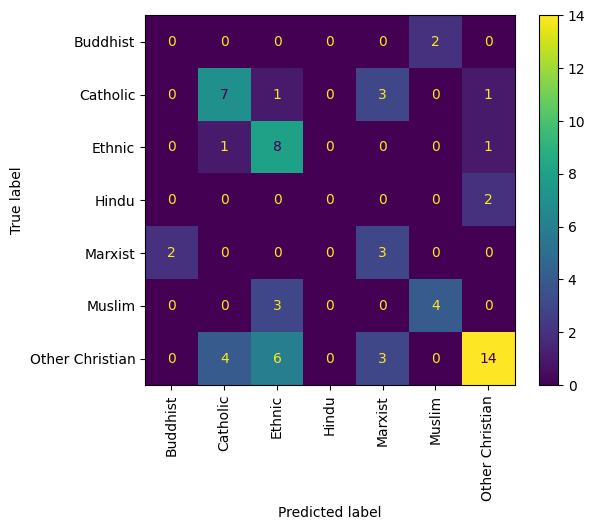

In [38]:
plt.figure()
#cmp = ConfusionMatrixDisplay(cm, display_labels=religion_encoder.classes_, xticks_rotation="vertical")
cmp = ConfusionMatrixDisplay.from_estimator(best_pipe, X_test, y_test, display_labels=religion_encoder.classes_[:-1], xticks_rotation="vertical")
#cmp.plot()

In [39]:
# selector_modes = list(cs_results["feature_selector__mode"].unique())
# score_functions = list(cs_results["feature_selector__score_func"].unique())
# cs_heatmaps = []


# for score_function in score_functions:
#     for selector_mode in selector_modes:
#         plt.figure()
#         cs_heatmaps.append(sns.heatmap(cs_results[(cs_results["feature_selector__mode"] == selector_mode) & (cs_results["feature_selector__score_func"] == score_function)].pivot(index="classifier__alpha", columns="feature_selector__param", values="score_mean"), vmin=0.0, vmax=0.55))
#         cs_heatmaps[-1].set_xlabel(f"Mode: {selector_mode} ({score_function})")
#         cs_heatmaps[-1].set_ylabel("Alpha")
#         cs_heatmaps[-1].set_title(f"Complement Naive Bayes {scoring_criterium} by Selector Parameter and Alpha")

In [40]:
features_scores = pd.DataFrame(list(zip(best_pipe[-2].scores_, best_pipe[-2].feature_names_in_)), columns=["Score", "Name"]).sort_values("Score", ascending=False)
included_features = best_pipe[-2].get_feature_names_out()
features_scores

Score             Name
34  0.451542       landmass_5
36  0.433182           zone_1
47  0.299271  language_Others
32  0.291224       landmass_3
9   0.254332            white
..       ...              ...
24  0.000000    mainhue_brown
23  0.000000     mainhue_blue
22  0.000000    mainhue_black
21  0.000000             text
64  0.000000   botright_white

[65 rows x 2 columns]

Text(0.5, 1.0, 'Feature Importance as determined by mutual_info_classif')

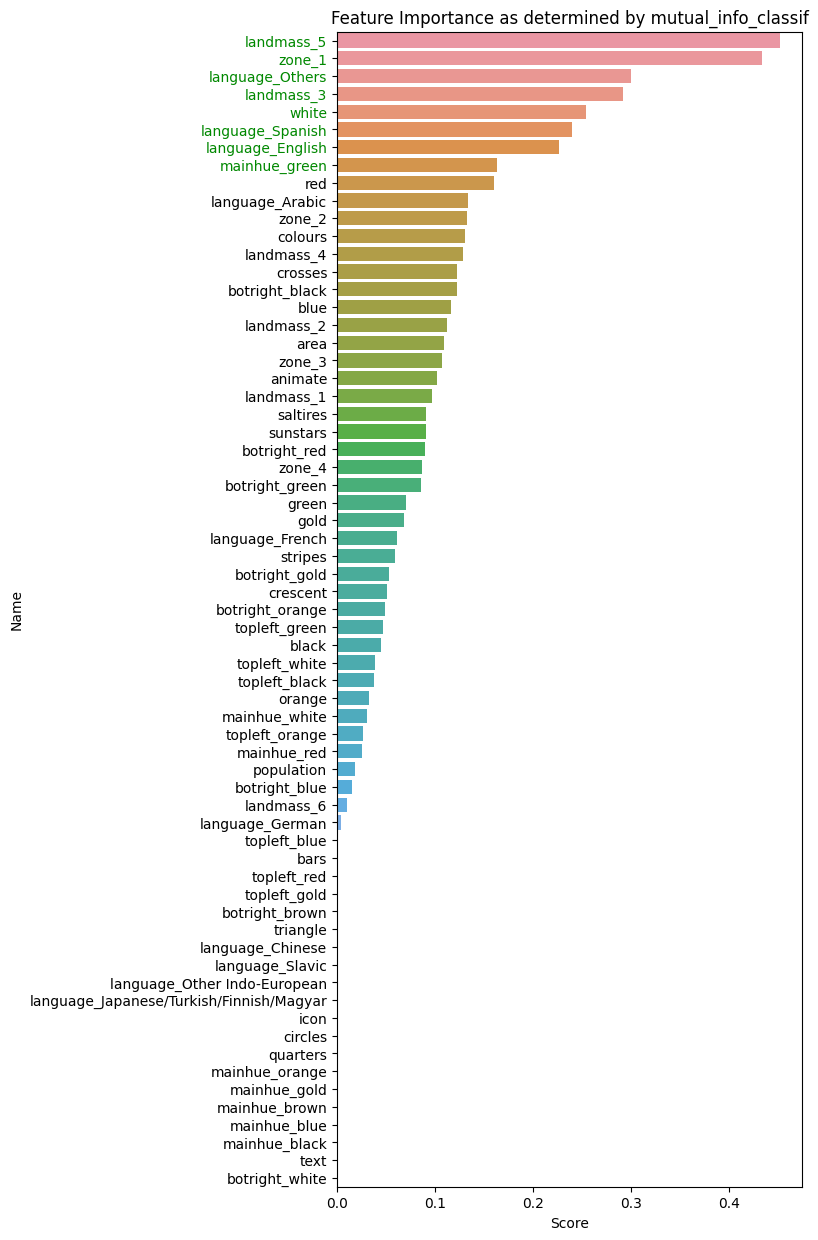

In [41]:
scoring_fig, scoring_ax = plt.subplots(figsize=(6, 15))
sns.barplot(features_scores, y="Name", x="Score", orient="horizontal", width=0.8, dodge=True, ax=scoring_ax)
for t in scoring_ax.yaxis.get_ticklabels():
    if t.get_text() in included_features:
        t.set_color("#008800")
scoring_ax.set_title(f"Feature Importance as determined by {best_pipe[-2].get_params()['score_func'].__name__}")

In [42]:
print(classification_report(y_true=y_test, y_pred=y_predicted, target_names=religion_encoder.classes_[:-1]))

                 precision    recall  f1-score   support

       Buddhist       0.00      0.00      0.00         2
       Catholic       0.58      0.58      0.58        12
         Ethnic       0.44      0.80      0.57        10
          Hindu       0.00      0.00      0.00         2
        Marxist       0.33      0.60      0.43         5
         Muslim       0.67      0.57      0.62         7
Other Christian       0.78      0.52      0.62        27

       accuracy                           0.55        65
      macro avg       0.40      0.44      0.40        65
   weighted avg       0.60      0.55      0.55        65



c:\Users\vali\Documents\GitHub\Studium\ml\ML_SS_23\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vali\Documents\GitHub\Studium\ml\ML_SS_23\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vali\Documents\GitHub\Studium\ml\ML_SS_23\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera